Concatenating all of the CSV Files together to have an easier time handling all the data at once (excluding the median-rent dataset)

Problem: In the median_rent dataset there were towns that were duplicated because some ended with Spaces while some had no spaces, some 'KALLANG/WHAMPOA' were labelled as 'KALLANG/ WHAMPOA'
Solution: Loop through ['town'] and do .strip() to remove any whitespaces. Use the if condition to check if 'KALLANG' is in the current ['town'] iteration, then replace it with 'KALLANG/WHAMPOA'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# File paths for the CSV files
resale_1990_1999 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-1990-1999.csv'
resale_2000_2012 = './resale-flat-price-CSVs/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv'
resale_mar2012_dec2014 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv'
resale_jan2015_dec2016 = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
resale_2017_onwards = './resale-flat-price-CSVs/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'
median_rent = './median-rent-by-town-and-flat-type/median-rent-by-town-and-flat-type.csv'
renting_out_flats = './renting-out-of-flats.csv'

# Load the datasets from CSV files
data1 = np.genfromtxt(resale_1990_1999, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data2 = np.genfromtxt(resale_2000_2012, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data3 = np.genfromtxt(resale_mar2012_dec2014, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data4 = np.genfromtxt(resale_jan2015_dec2016, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data5 = np.genfromtxt(resale_2017_onwards, encoding=None, dtype=None, delimiter=',', names=True, usecols=("month", "town", "flat_type", "lease_commence_date", "resale_price"))
data6 = np.genfromtxt(median_rent, encoding=None, dtype=None, delimiter=',', names=True, usecols=("quarter", "town", "flat_type", "median_rent"))
data7 = np.genfromtxt(renting_out_flats, encoding=None, dtype=None, delimiter=',', names=True, usecols=("rent_approval_date", "town", "flat_type", "monthly_rent"))

# Combine the datasets into one array
concatenated_data = np.concatenate((data1, data2, data3, data4, data5))

# Save the combined array to a new CSV file 
#Just used for checking
#np.savetxt('combined_data.csv', concatenated_data, delimiter=',', fmt='%s')

#Data sanitation
def sanitization_function():
    #counter = 0
    for i in range(len(concatenated_data)):
        concatenated_data[i]['town'] = concatenated_data[i]['town'].strip()

    for i in range(len(data6)):
        data6[i]['town'] = data6[i]['town'].strip()
        
        if 'KALLANG' in data6[i]['town']:
            data6[i]['town'] = 'KALLANG/WHAMPOA'

        if not data6[i]['median_rent'].isnumeric() or data6[i]['median_rent'] == 'na':
            data6[i]['median_rent'] = 'NA'
            
        # if ('2020' in data6[i]['quarter'] or '2021' in data6[i]['quarter'] or '2022' in data6[i]['quarter'] or '2023' in data6[i]['quarter']) and (data6[i]['median_rent'] == 'NA'):
        #    counter += 1
        # Used to debug amount of filtered out 'NA'
    #print(counter)
sanitization_function()

#Checks to see if the number of towns in the median_rent dataset corelates to the concatenated dataset
''' unique_towns = np.unique(concatenated_data['town'])
unique_towns2 = np.unique(data6['town'])
print(len(unique_towns))
print(len(unique_towns2)) '''


" unique_towns = np.unique(concatenated_data['town'])\nunique_towns2 = np.unique(data6['town'])\nprint(len(unique_towns))\nprint(len(unique_towns2)) "

Dataset used: resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv & median-rent-by-town-and-flat-type.csv

Pecularities: The median-rent dataset included some data from 2023 but the resale dataset did not, hence, I decided to keep to using collected data from 2020 - 2022 only in order to keep the
              data comparisons between Flat Types fair and accurate

Question:
Which flat type have the most recorded data amongst both Resale and calculated Median Rent?

Findings and Insight:
 - Based on the displayed Pie Chart, it is shown that 4-ROOM Flat Types have the most amount of relevant resale and rental data recorded.
 - This would make 4-ROOM Flat Type the most optimal choice to invest in, since the market for 4-ROOM Flat Types have the highest number of activity across recent years

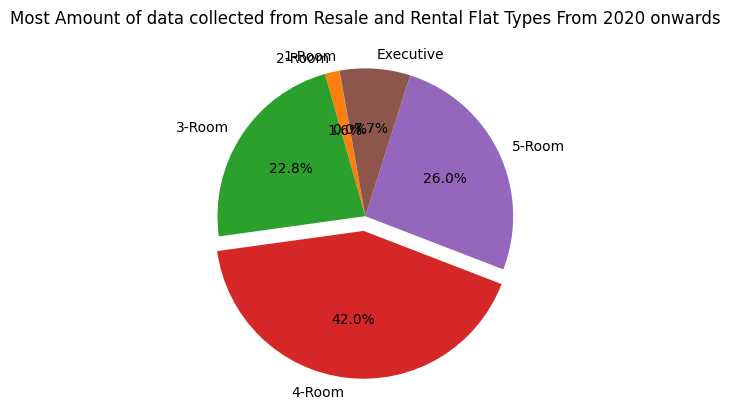

In [3]:
keyword1 = '1 ROOM'
keyword2 = '2 ROOM'
keyword3 = '3 ROOM'
keyword4 = '4 ROOM'
keyword5 = '5 ROOM'
keyword6 = 'EXECUTIVE'     


keyword7 = '1-RM'
keyword8 = '2-RM'
keyword9 = '3-RM'
keyword10 = '4-RM'
keyword11 = '5-RM'
keyword12 = 'EXEC'  

#data1
""" 
data1_1flat = data1[data1['flat_type'] == keyword1]
data1_2flat = data1[data1['flat_type'] == keyword2]
data1_3flat = data1[data1['flat_type'] == keyword3]
data1_4flat = data1[data1['flat_type'] == keyword4]
data1_5flat = data1[data1['flat_type'] == keyword5]
data1_Exec = data1[data1['flat_type'] == keyword6]  

#data2
data2_1flat = data2[data2['flat_type'] == keyword1]
data2_2flat = data2[data2['flat_type'] == keyword2]
data2_3flat = data2[data2['flat_type'] == keyword3]
data2_4flat = data2[data2['flat_type'] == keyword4]
data2_5flat = data2[data2['flat_type'] == keyword5]
data2_Exec = data2[data2['flat_type'] == keyword6]

#data3
data3_1flat = data3[data3['flat_type'] == keyword1]
data3_2flat = data3[data3['flat_type'] == keyword2]
data3_3flat = data3[data3['flat_type'] == keyword3]
data3_4flat = data3[data3['flat_type'] == keyword4]
data3_5flat = data3[data3['flat_type'] == keyword5]
data3_Exec = data3[data3['flat_type'] == keyword6] 

#data4
data4_1flat = data4[data4['flat_type'] == keyword1]
data4_2flat = data4[data4['flat_type'] == keyword2]
data4_3flat = data4[data4['flat_type'] == keyword3]
data4_4flat = data4[data4['flat_type'] == keyword4]
data4_5flat = data4[data4['flat_type'] == keyword5]
data4_Exec = data4[data4['flat_type'] == keyword6] """

#data5
''' data5_1flat = data5[data5['flat_type'] == keyword1]
data5_2flat = data5[data5['flat_type'] == keyword2]
data5_3flat = data5[data5['flat_type'] == keyword3]
data5_4flat = data5[data5['flat_type'] == keyword4]
data5_5flat = data5[data5['flat_type'] == keyword5]
data5_Exec = data5[data5['flat_type'] == keyword6] '''

#Only using data from 2020 and onwards because they are the most recent and relevant data

#data5
arr = []
for i in range(len(data5)):
    if '2020' in data5[i]['month'] or '2021' in data5[i]['month'] or '2022' in data5[i]['month']:
        arr.append(data5[i])
    else:
        i = i

np_arr = np.array(arr)

data5_1flat = np_arr[np_arr['flat_type'] == keyword1]
data5_2flat = np_arr[np_arr['flat_type'] == keyword2]
data5_3flat = np_arr[np_arr['flat_type'] == keyword3]
data5_4flat = np_arr[np_arr['flat_type'] == keyword4]
data5_5flat = np_arr[np_arr['flat_type'] == keyword5]
data5_Exec = np_arr[np_arr['flat_type'] == keyword6]

#data6
arr2 = []
for i in range(len(data6)):
    if ('2020' in data6[i]['quarter'] or '2021' in data6[i]['quarter'] or '2022' in data6[i]['quarter']) and (data6[i]['median_rent'] != 'NA'):
        arr2.append(data6[i])
    else:
        i = i

np_arr_2 = np.array(arr2)

data6_1flat = np_arr_2[np_arr_2['flat_type'] == keyword7]
data6_2flat = np_arr_2[np_arr_2['flat_type'] == keyword8]
data6_3flat = np_arr_2[np_arr_2['flat_type'] == keyword9]
data6_4flat = np_arr_2[np_arr_2['flat_type'] == keyword10]
data6_5flat = np_arr_2[np_arr_2['flat_type'] == keyword11]
data6_Exec = np_arr_2[np_arr_2['flat_type'] == keyword12]


total_1_room_flat_resales_and_median_rent_by_quarters = len(data5_1flat) + len(data6_1flat)
total_2_room_flat_resales_and_median_rent_by_quarters = len(data5_2flat) + len(data6_2flat)
total_3_room_flat_resales_and_median_rent_by_quarters = len(data5_3flat) + len(data6_3flat)
total_4_room_flat_resales_and_median_rent_by_quarters = len(data5_4flat) + len(data6_4flat)
total_5_room_flat_resales_and_median_rent_by_quarters = len(data5_5flat) + len(data6_5flat)
total_exec_room_flat_resales_and_median_rent_by_quarters = len(data5_Exec) + len(data6_Exec)


flat_types = ['1-Room', '2-Room','3-Room','4-Room','5-Room','Executive']
room_type_counts = [total_1_room_flat_resales_and_median_rent_by_quarters,total_2_room_flat_resales_and_median_rent_by_quarters,total_3_room_flat_resales_and_median_rent_by_quarters,total_4_room_flat_resales_and_median_rent_by_quarters,total_5_room_flat_resales_and_median_rent_by_quarters,total_exec_room_flat_resales_and_median_rent_by_quarters]
explode = [0,0,0,0.1,0,0]

plt.pie(room_type_counts, labels=flat_types, autopct='%1.1f%%', startangle=100, explode=explode)
plt.title('Most Amount of data collected from Resale and Rental Flat Types From 2020 onwards')
plt.show()

Dataset used: 
- renting-out-of-flats.csv

Questions:

- What is the total number of rentals that were approved in each Town?

- Which towns have the most/are the most popular when it comes to number of recorded approved rentals?

Findings and Insight:

- The bar graph below represents the total number of approved rentals for each Town from January 2021 - April 2023
- Through the usage of bar graph visualisation, the top few towns with the most number of recorded rentals are Yishun, Jurong West, Tampines and Serangoon being the highest

The findings above are especially useful because it allows us to be able to identify and weed out the non-popular areas so that the investor can make the most optimal investment decision according to the areas

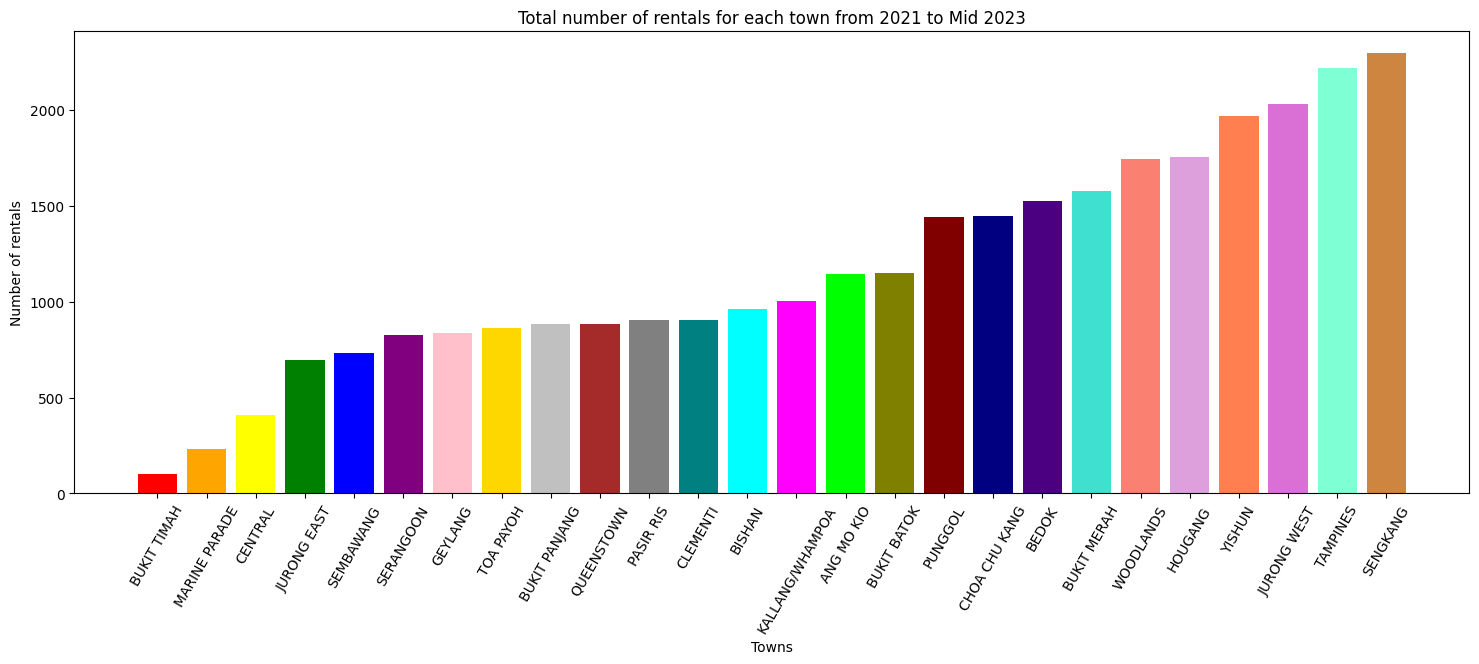

In [4]:

data7_np = np.array(data7)

dict = {}

towns = [
    'ANG MO KIO',
    'BEDOK',
    'BISHAN',
    'BUKIT BATOK',
    'BUKIT MERAH',
    'BUKIT PANJANG',
    'BUKIT TIMAH',
    'CENTRAL',
    'CHOA CHU KANG',
    'CLEMENTI',
    'GEYLANG',
    'HOUGANG',
    'JURONG EAST',
    'JURONG WEST',
    'KALLANG/WHAMPOA',
    'MARINE PARADE',
    'PASIR RIS',
    'PUNGGOL',
    'QUEENSTOWN',
    'SEMBAWANG',
    'SENGKANG',
    'SERANGOON',
    'TAMPINES',
    'TOA PAYOH',
    'WOODLANDS',
    'YISHUN'
]

x_label = 'Towns'
y_label = 'Number of rentals'
title = 'Total number of rentals for each town from 2021 to Mid 2023'
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'pink', 'gold', 'silver', 'brown', 'gray', 'teal', 'cyan', 'magenta', 'lime', 'olive', 'maroon', 'navy', 'indigo', 'turquoise', 'salmon', 'plum', 'coral', 'orchid', 'aquamarine', 'peru']



plt.figure(figsize=(18,6))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=60)

for town in towns:  
    for item in data7_np:
        flat_type = item['flat_type']
        if town == item['town']:
            town = item['town']
            if (flat_type == '4-ROOM'):
                try:
                    town_rental_count = {town: dict[town] + 1}
                except:
                    town_rental_count = {town: 1}
                
                dict.update(town_rental_count)

sorted_dict = sorted(dict.items(), key=lambda x:x[1])

sorted_towns = [item[0] for item in sorted_dict]
sorted_counts = [item[1] for item in sorted_dict]

plt.bar(sorted_towns, sorted_counts, color=colors)
    


plt.show()







Dataset used:
- renting-out-of-flats.csv

Pretext:
- We have identified the top few towns that has the most number of recorded approved rentals

Questions:
- What are the trends for the number of rentals happening each month in these top few towns like over the recent years?

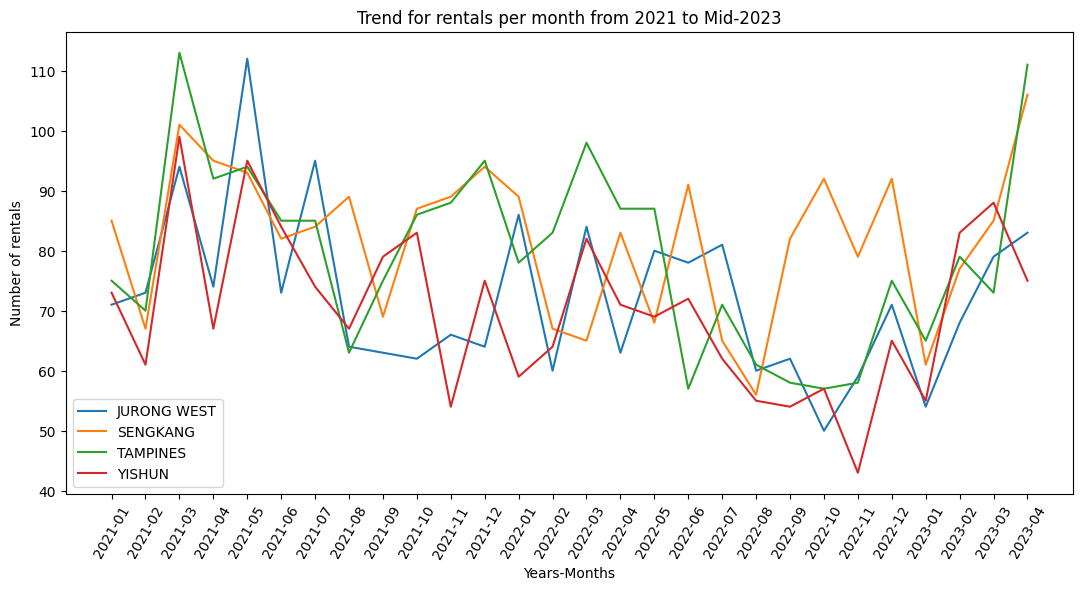

In [19]:
dict = {}

towns = [
    # 'ANG MO KIO',
    # 'BEDOK',
    # 'BISHAN',
    # 'BUKIT BATOK',
    # 'BUKIT MERAH',
    # 'BUKIT PANJANG',
    # 'BUKIT TIMAH',
    # 'CENTRAL',
    # 'CHOA CHU KANG',
    # 'CLEMENTI',
    # 'GEYLANG',
    # 'HOUGANG',
    # 'JURONG EAST',
    'JURONG WEST',
    # 'KALLANG/WHAMPOA',
    # 'MARINE PARADE',
    # 'PASIR RIS',
    # 'PUNGGOL',
    # 'QUEENSTOWN',
    # 'SEMBAWANG',
    'SENGKANG',
    # 'SERANGOON',
    'TAMPINES',
    # 'TOA PAYOH',
    # 'WOODLANDS',
    'YISHUN'
]

x_label = 'Years-Months'
y_label = 'Number of rentals'
title = 'Trend for rentals per month from 2021 to Mid-2023'

plt.figure(figsize=(13,6))
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(title)
plt.xticks(rotation=60)

for town in towns:
    dict={}
    for item in data7_np:
        flat_type = item['flat_type']
        if town == item['town']:
            town = item['town']
            rent_approval_date = item['rent_approval_date']
            if (flat_type == '4-ROOM'):
                try:
                    lol = {rent_approval_date: dict[rent_approval_date] + 1}
                except:
                    lol = {rent_approval_date: 1}
                
                dict.update(lol)


    plt.plot(dict.keys(), dict.values())
    


plt.legend(towns)
plt.show()

In [16]:
data5_np = np.array(data5)
data6_np = np.array(data6)

top_towns = [
    'JURONG WEST',
    'SENGKANG',
    'TAMPINES',
]

recent_months_resale = []

start_year = 2021
start_month = 1

while start_year < 2024 or start_year == 2023:
    month_str = str(start_month).zfill(2)
    recent_months_resale.append(f'{start_year}-{month_str}')
    
    start_month += 1
    
    if start_month > 12:
        start_month = 1
        start_year += 1

quarters_median_rent = []

start_year = 2021
start_quarter = 1

while start_year < 2024 or start_year == 2023:
    quarter_str = str(f'Q{start_quarter}')
    quarters_median_rent.append(f'{start_year}-{quarter_str}')
    
    start_quarter += 1
    
    if start_quarter > 4:
        start_quarter = 1
        start_year += 1


for town in top_towns:

        first_quarter_resale_prices = []
        second_quarter_resale_prices = []
        third_quarter_resale_prices = []
        fourth_quarter_resale_prices = []

        first_quarter_median_rent = []
        second_quarter_median_rent = []
        third_quarter_median_rent = []
        fourth_quarter_median_rent = []

        for quarters in quarters_median_rent:
            for item in data6_np:

                flat_type = item['flat_type']
                quarter = item['quarter']

                if town == item['town']:

                    if quarters == quarter:
                        if (flat_type == '4-RM') and ('Q1' in quarters):
                            if (item['median_rent'] == 'NA'):
                                item['median_rent'] = 0
                            first_quarter_median_rent.append(item['median_rent'])
                        elif (flat_type == '4-RM') and ('Q2' in quarters):
                            if (item['median_rent'] == 'NA'):
                                item['median_rent'] = 0
                            second_quarter_median_rent.append(item['median_rent'])
                        elif (flat_type == '4-RM') and ('Q3' in quarters):
                            if (item['median_rent'] == 'NA'):
                                item['median_rent'] = 0
                            third_quarter_median_rent.append(item['median_rent'])
                        elif (flat_type == '4-RM') and ('Q4' in quarters):
                            if (item['median_rent'] == 'NA'):
                                item['median_rent'] = 0
                            fourth_quarter_median_rent.append(item['median_rent'])

        for months in recent_months_resale:

            for item in data5_np:
                
                flat_type = item['flat_type']
                month = item['month']

                if town == item['town']:

                    if months == month:
                        if (flat_type == '4 ROOM') and ('-01' in months) or ('-02' in months) or ('-03' in months):
                            first_quarter_resale_prices.append(item['resale_price'])
                        elif (flat_type == '4 ROOM') and ('-04' in months) or ('-05' in months) or ('-06' in months):
                            second_quarter_resale_prices.append(item['resale_price'])
                        elif (flat_type == '4 ROOM') and ('-07' in months) or ('-08' in months) or ('-09' in months):
                            third_quarter_resale_prices.append(item['resale_price'])
                        elif (flat_type == '4 ROOM') and ('-10' in months) or ('-11' in months) or ('-12' in months):
                            fourth_quarter_resale_prices.append(item['resale_price'])
            
        mean_resale_price_quarter_1 = np.sum(first_quarter_resale_prices)/len(first_quarter_resale_prices)
        mean_resale_price_quarter_2 = np.sum(second_quarter_resale_prices)/len(second_quarter_resale_prices)
        mean_resale_price_quarter_3 = np.sum(third_quarter_resale_prices)/len(third_quarter_resale_prices)
        mean_resale_price_quarter_4 = np.sum(fourth_quarter_resale_prices)/len(fourth_quarter_resale_prices)

        print(f'The mean resale value of flats in {town} from Jan to Mar {months[:4]} is: $','{:,.0f}'.format(mean_resale_price_quarter_1))
        print(f'The mean resale value of flats in {town} from Apr to June {months[:4]} is: $','{:,.0f}'.format(mean_resale_price_quarter_2))
        print(f'The mean resale value of flats in {town} from July to Sept {months[:4]} is: $','{:,.0f}'.format(mean_resale_price_quarter_3))
        print(f'The mean resale value of flats in {town} from Oct to Dec {months[:4]} is: $','{:,.0f}'.format(mean_resale_price_quarter_4), '\n')
        



            
    

The mean resale value of flats in JURONG WEST from Jan to Mar 2023 is: $ 472,301
The mean resale value of flats in JURONG WEST from Apr to June 2023 is: $ 478,361
The mean resale value of flats in JURONG WEST from July to Sept 2023 is: $ 482,755
The mean resale value of flats in JURONG WEST from Oct to Dec 2023 is: $ 494,607 

The mean resale value of flats in SENGKANG from Jan to Mar 2023 is: $ 518,009
The mean resale value of flats in SENGKANG from Apr to June 2023 is: $ 528,620
The mean resale value of flats in SENGKANG from July to Sept 2023 is: $ 529,607
The mean resale value of flats in SENGKANG from Oct to Dec 2023 is: $ 537,100 

The mean resale value of flats in TAMPINES from Jan to Mar 2023 is: $ 539,103
The mean resale value of flats in TAMPINES from Apr to June 2023 is: $ 548,420
The mean resale value of flats in TAMPINES from July to Sept 2023 is: $ 557,679
The mean resale value of flats in TAMPINES from Oct to Dec 2023 is: $ 549,720 

The mean resale value of flats in YIS

In [24]:
quarters_median_rent = []

start_year = 2021
start_quarter = 1

while start_year < 2024 or start_year == 2023:
    quarter_str = str(f'Q{start_quarter}')
    quarters_median_rent.append(f'{start_year}-{quarter_str}')
    
    start_quarter += 1
    
    if start_quarter > 4:
        start_quarter = 1
        start_year += 1

print(quarters_median_rent)

['2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1', '2023-Q2', '2023-Q3', '2023-Q4']
